
<div style="background-color: #0071CE; color: white; padding: 20px; text-align: center; border-radius: 10px;">
    <h1 style="font-size: 36px; margin-bottom: 0;">Walmart Product Reviews - Aspect Based Sentiment Analysis </h1>
    <div style="font-size: 24px; margin-top: 5px;">By Netanel Farhi & Liraz Sitruk</div>
    <div style="margin-top: 20px;">
       
    
</div>


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<ttents</title>
<style>
  body {
    font-family: Arial, sans-serif;
    margin: 20px;
  }
  h1 {
    text-align: center;
    color: #333;
  }
  ul {
    list-style-type: none;
    padding-left: 0;
  }
  li {
    margin-bottom: 10px;
  }
  a {
    text-decoration: none;
    color: #007bff;
    transition: color 0.3s;
  }
  a:hover {
    color: #0056b3;
  }
  .sub-list {
    margin-left: 20px;
  }
</style>
</head>
<body>

<h1>Table of Contents</h1>

<ul>
  <li><a href="#introduction">Introduction</a></li>
  <li><a href="#data-collection">Data Collection</a>
    <ul class="sub-list">
      <li><a href="#web-scraping">Web Scraping</a></li>
      <li><a href="#data-structure">About the Data - Data Structure</a></li>
    </ul>
  </li>
  <li><a href="#data-preparation">Data Preparation and Cleaning</a>
    <ul class="sub-list">
      <li><a href="#duplicate-removal">Duplicate Removal</a></li>
      <li><a href="#empty-reviews">Remove Empty Reviews</a></li>
      <li><a href="#feature-engineering">Feature Engineering</a></li>
      <li><a href="#language-detection">Language Detection</a></li>
      <li><a href="#numerals-to-text">Convert Numerals to Text</a></li>
      <li><a href="#visualizations">Visualizations</a></li>
    </ul>
  </li>
  <li><a href="#nlp-unsupervised-learning">NLP Machine Learning for Unsupervised Learning</a>
    <ul class="sub-list">
      <li><a href="#extract-aspects">Extract Aspects from Text</a></li>
      <li><a href="#categorize-aspect">Categorize Aspects</a></li>
      <li><a href="#load-pretrained-model">Load Pretrained Model and Classify Sentiments</a></li>
      <li><a href="#pretrained-model-results">Pretrained Model Results</a></li>
      <li><a href="#load-vader-model">Load Vader Model</a></li>
      <li><a href="#vader-results">Vader Results</a></li>
      <li><a href="#load-textblob">Load TextBlob</a></li>
      <li><a href="#textblob-results">TextBlob Results</a></li>
      <li><a href="#models-comparison">Models Comparison</a></li>
      <li><a href="#models-evaluation">Models Evaluation</a></li>
      <li><a href="#model-selection">Model Selection</a></li>
    </ul>
  </li>
  <li><a href="#absa-final-result">ABSA - Final Result</a></li>
  <li><a href="#pipeline">Pipeline for Application Use</a></li>
</ul>

</body>
</html>


<a id="#introduction"></a>


<h1 style="text-align: center" class="list-group-item list-group-item-action active">1. Introduction</h1></a>
></a> In this workbook, we embark on an unsupervised sentiment analysis journey, leveraging RoBERTa, a cutting-edge language model, to delve into the nuances of Walmart customer reviews. Our goal is to extract and understand the underlying sentiments associated with different aspects of products, such as quality, price, or usability, without the need for pre-labeled data.

RoBERTa, an enhancement of BERT (Bidirectional Encoder Representations from Transformers), is renowned for its ability to capture the context of words in text comprehensively. By employing RoBERTa, we aim to automatically identify sentiment trends and insights from large volumes of unstructured review data, providing valuable feedback for improving product offerings and customer satisfaction.

This approach allows us to analyze sentiments on a granular level, paving the way for detailed aspect-based analysis directly from customer feedback. Let's explore how RoBERTa can help us uncover what customers truly think about Walmart's products.


![](https://miro.medium.com/max/966/1*rJQVqDjbhI3k22lHqa4dFw.png)


<a id="##data-collection"></a>


<h1 style="text-align: center" class="list-group-item list-group-item-action active">2. Data Collection</h1>
<a id="2"></a>
The Data Collection Phase in the NLP pipeline is crucial for obtaining information-rich and clean data from specified sources. Our project involves collecting data from Walmart's webpage, where we use web scraping techniques that comply with legal standards.

<h2 style="text-align: center" class="list-group-item list-group-item-success">2.1 Web Scraping</h2>
<a id="2.1"></a>


Our project aims to analyze customer opinions on various aspects of products sold by Walmart, using reviews left by shoppers. Collecting such a vast amount of information by hand isn't practical. That's why we turn to **Web Scraping** as an automated solution to efficiently collect the data we need.

This technique allows us to extract large quantities of data from Walmart's website and organize it into a structured dataframe, making it ready for our analysis.

In executing this process, we meticulously adhere to legal and ethical guidelines, specifically obeying Walmart's `robots.txt` directives. The allowance `Allow: /reviews/product/` in Walmart's `robots.txt` permits us to scrape product reviews, ensuring our methods are both effective and compliant with Walmart's regulations.

For data acquisition, we employ the Python library BeautifulSoup, favored for its effectiveness in parsing HTML content. To ensure a comprehensive dataset, for each product ID, we scrape two pages of reviews for each rating level (1 to 5 stars). This approach allows us to extract approximately 200 rows of data per product, assuming reviews are available across all star levels. 

To maintain ethical scraping practices, we implement a timer to pause between requests, preventing our activities from being flagged as robotic by Walmart's servers. This careful pacing, along with a strategic approach to scraping, ensures we gather extensive data while minimizing the risk of server overload or access denial. After scraping a predetermined number of products, we amass a significant dataset, denoted by Y rows, which forms the basis of our analysis.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [2]:
def scrape_walmart_reviews(product_ids):
    base_url = "https://www.walmart.com/reviews/product/"
    user_agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}
    reviews_data = []

    for product_id in product_ids:
        # Initial request to fetch the product name
        product_name_url = f"{base_url}{product_id}"
        response = requests.get(product_name_url, headers=user_agent)
        product_name = "Product name not found"  # Default value
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            a_tag = soup.find('a', class_='w_x7ug f6 dark-gray', href=True)
            if a_tag:
                product_name = a_tag.text  # Extract the product name

        # Proceed to scrape reviews
        for stars in range(1, 6):
            for page in range(1, 3):  # Scrape 2 pages for each star rating
                url = f"{base_url}{product_id}?sort=submission-desc&filter={stars}&page={page}"
                response = requests.get(url, headers=user_agent)
                if response.status_code != 200:
                    continue  # Skip this iteration if the page fails to load
                soup = BeautifulSoup(response.content, 'html.parser')

                review_elements = soup.find_all('div', class_='w_DHV_ pv3 mv0')
                for review_element in review_elements:
                    title_element = review_element.find('h3', class_='w_kV33 w_Sl3f w_mvVb f5 b')
                    title = title_element.text if title_element else 'No Title'
                    
                    text_element = review_element.find('span', class_='tl-m mb3 db-m')
                    text = text_element.text if text_element else 'No Review Text'
                    
                    reviewer_name_element = review_element.find('div', class_='f6 gray pr2 mb2')
                    reviewer_name = reviewer_name_element.text if reviewer_name_element else 'Anonymous'
                    
                    stars_given_element = review_element.find('span', class_='w_iUH7')
                    stars_given = stars_given_element.text if stars_given_element else 'No Rating'
                    
                    review_date_element = review_element.find('div', class_='f7 gray mt1')
                    review_date = review_date_element.text if review_date_element else 'No Date'
                    
                    original_platform_element = review_element.find('div', class_='b ph1 dark gray', attrs={'data-qm-mask': "true"})
                    original_platform = original_platform_element.text if original_platform_element else 'Walmart'
                    
                    reviews_data.append({
                        'Product ID': product_id,
                        'Product Name': product_name,
                        'Title': title,
                        'Review Text': text,
                        'Reviewer Name': reviewer_name,
                        'Original Platform': original_platform,
                        'Stars Given': stars_given,
                        'Review Date': review_date,
                    })
                    
                    if len(product_ids)>4:
                        print(len(product_ids))

                        time.sleep(10)  

    return pd.DataFrame(reviews_data)


product_id = ["5020133971"]  

#reviews_df = scrape_walmart_reviews(product_id)
#reviews_df

<h2 style="text-align: center" class="list-group-item list-group-item-success"> 2.2 About the Data </h2><a id="2.2"></a>

This dataset is a rich compilation of product reviews, meticulously sourced from Walmart's online platform. Originating from an extensive effort to capture a diverse range of consumer opinions, over 20,000 product reviews were collected. The scraping targeted specific product attributes to ensure a dataset conducive to comprehensive sentiment analysis.
<h3>Data Structure</h3>
The dataset is structured into tables, with each table representing reviews for individual products. For our analysis, we target scraping the following attributes to provide a rich dataset for sentiment analysis:

- **Product ID**: The unique identifier for each product.
- **Product Name**: The name given to each product.
- **Title**: The title of each review, which sometimes can encapsulate the sentiment of the review text.
- **Review Text**: The detailed opinion left by the customer.
- **Reviewer Name**: The name or identifier of the reviewer.
- **Original Platform**: The platform where the review was originally posted, if available.
- **Stars Given**: The star rating given to the product by the reviewer.
- **Review Date**: The date when the review was posted.


These attributes were chosen to provide insights not only into the sentiment expressed in the reviews but also into the context and specifics that can be tied back to each product and its perceived quality and reception by customers.

<h3>Department column</h3>
<p>In the scraping process, it was discovered that Walmart's website does not permit extraction of product departments due to restrictions.
To address this limitation, we manually added the departments of the products.</p>

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import spacy

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw')

#!pip install wordcloud
#!pip install --upgrade pillow wordcloud
#!pip install --upgrade jinja2
#!pip install inflect
#!pip install lingua
#!pip install lingua-language-detector

In [4]:
#raw_url = 'https://raw.githubusercontent.com/NetanelFarhi/Walmart-Data/main/Walmart%20Reviews%20Data%20Stage2.csv?token=GHSAT0AAAAAACPVTFFN3REYXCOQNSDMQWK2ZPWCZ6Q'
raw_url = 'https://raw.githubusercontent.com/NetanelFarhi/Walmart-Data/main/walmart_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(raw_url,encoding='ISO-8859-1')

df.head()

,Product ID,Product Name,Title,Review Text,Reviewer Name,Original Platform,Stars Given,Review Date,Scrape Date,Department
0,892658852,"Back to Nightstand with Charging Station, Nigh...",Mistake!!,It is a beautiful piece but the Reset and Off ...,Patricia,Walmart,5 out of 5 stars review,No Date,00/01/1900,Home
1,892658852,"Back to Nightstand with Charging Station, Nigh...",Not what I expected,Beautiful design and looked like what I wanted...,Julie,Walmart,2 out of 5 stars review,No Date,00/01/1900,Home
2,892658852,"Back to Nightstand with Charging Station, Nigh...",Night stand,We were sent the wrong part got two number six...,tanika,Walmart,1 out of 5 stars review,2/17/2024,00/01/1900,Home
3,892658852,"Back to Nightstand with Charging Station, Nigh...",Very cheap! Do not recommend at all!,"It is very cheaply made. As I was building it,...",Donna,Walmart,1 out of 5 stars review,12/03/2023,00/01/1900,Home
4,892658852,"Back to Nightstand with Charging Station, Nigh...",Missing pieces to put together,I got two number 7 pieces when i should've onl...,Caitlin,Walmart,1 out of 5 stars review,11/06/2023,00/01/1900,Home


In [5]:
##for the pipeline check
dm=df[df["Product ID"]==2311706193].copy()
dm

,Product ID,Product Name,Title,Review Text,Reviewer Name,Original Platform,Stars Given,Review Date,Scrape Date,Department
13401,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...","great phone, lots of storage","it's easy to use and setup, lots of storage. ...",Millie M,straighttalk.com,5 out of 5 stars review,No Date,15/03/2024,Electronics
13402,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",do not buy phone will have to be returned,This was a complete waste of time and money. T...,Victoria,Walmart,1 out of 5 stars review,No Date,15/03/2024,Electronics
13403,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",do not buy phone will have to be returned,This was a complete waste of time and money. T...,Victoria,Walmart,1 out of 5 stars review,9/28/2023,15/03/2024,Electronics
13404,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",Bad phone!,Had to go back to the store multiple times for...,Reenie,Walmart,1 out of 5 stars review,7/20/2023,15/03/2024,Electronics
13405,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",Don't recommend buying a phone from Walmart.,I bought this phone and it wouldn't even work....,Jen,Walmart,1 out of 5 stars review,8/15/2023,15/03/2024,Electronics
...,...,...,...,...,...,...,...,...,...,...
13608,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",Very happy,I am pleased with the phone i am very happy wi...,Kathleen Arispe,straighttalk.com,5 out of 5 stars review,9/13/2023,15/03/2024,Electronics
13609,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",Better than an a10e,The phone is an upgrade from my a10 e for sure...,Kakeman,straighttalk.com,5 out of 5 stars review,10/10/2023,15/03/2024,Electronics
13610,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",Samsung A14,"My new A14 is easy to use, and transfer from m...",rebecca,Walmart,5 out of 5 stars review,9/15/2023,15/03/2024,Electronics
13611,2311706193,"Back to Straight Talk Samsung Galaxy A14, 5G, ...",Good phone,"Nice size, very slim. Different plug then old ...",HRC1,straighttalk.com,5 out of 5 stars review,09/01/2023,15/03/2024,Electronics


In [6]:
df.shape

(20899, 10)

<h2 style="text-align: center" class="list-group-item list-group-item-success">3. Data Preparation and Cleaning </h2>
<a id="2.3"></a>
<p>In preparation for sophisticated Natural Language Processing (NLP) tasks, it's essential to refine and standardize our dataset thoroughly.
    Below, we outline the vital measures we have taken to enhance our dataset's quality:</p>
<ul>
    <li><strong>Duplicate Removal:</strong> Duplicates may have slipped into our collection during data acquisition. We systematically locate and eliminate these to guarantee the distinctiveness of our dataset.</li>
    <li><strong>Numerical Conversion of Ratings:</strong> To simplify the analysis, we developed a method, <code>extract_rating</code>, that transforms text-based ratings into numerical values.</li>
    <li><strong>Identifying English Content:</strong> We utilize a language detection tool to sieve through the data, ensuring our dataset consists solely of English texts, compatible with our NLP tools.</li>
    <li><strong>Textualizing Numerals:</strong> To normalize the dataset for textual analysis, we convert numbers in the text into words using the <code>inflect</code> tool.</li>
    <li><strong>Refining Product Names:</strong> The data scraping phase sometimes captures irrelevant phrases like 'Back to' in product names. We remove such unnecessary elements to clarify the product names.</li>
</ul>
<p>Our comprehensive approach to data cleaning and organization is crucial in setting a robust groundwork for our NLP initiatives. It significantly boosts the dataset's precision and value, addressing a wide array of potential issues that could hinder the smooth execution of our model. This meticulous preparation is a critical step in achieving a highly effective NLP project..</p>


<h3>Duplicate Removal</h3>
<p>Identifying and eliminating duplicate entries to ensure dataset uniqueness.</p>


In [7]:
def drop_duplicates(df):
    subset_columns = ['Product ID', 'Product Name', 'Title', 'Review Text', 'Reviewer Name', 'Original Platform', 'Stars Given']
    if df.duplicated(subset=subset_columns).any():
        df.drop_duplicates(subset=subset_columns, inplace=True)
    return df

df = drop_duplicates(df)

<h3>Remove Empty Reviews</h3>
<p>Identifying and eliminating "No Review".</p>


In [8]:
df=df[df["Review Text"]!="No Review Text"]

<h3>Feature Engineering </h3>
<p>Numerical Conversion of Ratings - Transforming textual ratings like "5 out of 5 stars" into numerical format, e.g., 5, for consistent analysis.</p>


In [9]:
def extract_rating(stars_text):
    try:
        rating = int(stars_text.split()[0])
        return rating
    except:
        return None


df['Rating'] = df['Stars Given'].apply(extract_rating)


<p>Refining Product Names - Removing extraneous phrases from product names to enhance clarity and relevance.</p>


In [10]:
df['Product Name'] = df['Product Name'].str.replace('Back to', '')
#df

<h3>Language Detection</h3>
<p>Filtering non-English reviews to maintain dataset consistency with English-centric NLP tools.</p>


In [11]:
from lingua import Language, LanguageDetectorBuilder
import pandas as pd

def detect_language(df, text_column='Review Text', language_column='language'):
   
    # Setup languages and language detector
    languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]
    detector = LanguageDetectorBuilder.from_languages(*languages).build()

    # Define a function to detect language of a text
    def detect_language(text):
        try:
            # Attempt to detect the language
            language = detector.detect_language_of(text)
            return str(language)
        except Exception as e:
            # In case of any error, return a placeholder or handle the error as needed
            return "Unknown"

    # Apply the detect_language function to each review in the DataFrame
    df[language_column] = df[text_column].apply(detect_language)
    return df


df = detect_language(df)


In [12]:
#Example of a review in Spanish 
df[df["language"]=="Language.SPANISH"].iloc[2:3]

,Product ID,Product Name,Title,Review Text,Reviewer Name,Original Platform,Stars Given,Review Date,Scrape Date,Department,Rating,language
1512,130114690,Costway 3 Wheel Kids Ride On Motorcycle 6V Ba...,Muy buen producto,No me.pude quedar con el producto por q comedi...,nancy martinez,costway.com,5 out of 5 stars review,4/19/2021,00/01/1900,Toys,5,Language.SPANISH


In [13]:
df["language"].value_counts().to_frame().reset_index()

,index,language
0,Language.ENGLISH,13886
1,Language.SPANISH,7
2,Language.FRENCH,5
3,Language.GERMAN,4


In [14]:
df=df[df["language"]=="Language.ENGLISH"].copy()

<h3>Converting Numerals to Text</h3>
<p>Transforming numbers in review texts to words, e.g., converting "5 years old" to "five years old" for uniformity in textual analysis.</p>


In [15]:
import pandas as pd
import inflect
import re

# Create an instance of the inflect engine
p = inflect.engine()

# Function to convert numbers (integers and floats) into words while retaining format
def convert_numbers_to_words(text):
    # Regular expression pattern to match integers and floats
    pattern = r'\b\d+(?:\.\d+)?\b'
    # Find all numbers in the text using the pattern
    matches = re.findall(pattern, text)
    # Iterate over matches and convert each number into words
    for match in matches:
        # Convert the number into words
        words = p.number_to_words(match)
        # Replace the number with its words in the text
        text = text.replace(match, words)
    return text


# Apply the function to the "Review Text" column
df['Review Text'] = df['Review Text'].apply(convert_numbers_to_words)




Our preprocesses function using various techniques:

1. **Remove non-characters**: This step removes any characters that are not alphabetic characters or whitespaces using regular expression substitution.

2. **Handling negations and contractions**: It expands common contractions like "n't" to "not" and "'ve" to "have", etc. This makes the language more consistent and easier to process.

3. **Remove repeated characters**: This step reduces repeated characters to two occurrences, which helps in standardizing text and reducing noise.

4. **Convert to lowercase**: It converts all text to lowercase, ensuring uniformity and consistency in the text data.

5. **Remove stop words**: Stop words like "is", "the", "and", etc., are commonly occurring words that often don't contribute much to the meaning of the text. Removing them helps reduce noise in the data.

6. **Lemmatization**: This process reduces words to their base or root form (lemma), ensuring that different inflections of the same word are treated as a single item. It uses WordNetLemmatizer from NLTK library to perform lemmatization.

7. **Replacing**: It replaces dollar signs ('$') with the word "dollar". 

The function prepares text data for further analysis by cleaning it up, standardizing its format, and reducing noise.


In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Remove non-characters such as digits and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Handling negations and contractions
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'m", " am", text)
    
    # Remove repeated characters 
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Convert to lowercase
    text = text.lower()

    # remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    text = text.replace('$', 'dollar')

    return text


df['Review Text after'] = df['Review Text'].apply(preprocess_text)
df['Title after'] = df['Title'].apply(preprocess_text)

<h3>Visualization</h3>
<a id="2.4"></a>
<p>With our dataset cleaned, visualizations become crucial for uncovering insights. Here's a glimpse of what we've accomplished:</p>
<ul>
    <li><strong>Review and Product Counts:</strong> Data grouped by department reveals review and product counts, with color highlighting the departments with the highest review counts.</li>
    <li><strong>Rating Distribution:</strong> Bar charts demonstrate the frequency of each rating, offering insight into overall customer satisfaction.</li>
    <li><strong>Relative Percentage of Each Star Rating:</strong> Stacked bar charts display the percentage breakdown of each star rating within each department, providing a nuanced understanding of customer sentiment across different product categories.</li>
    <li><strong>Review Lengths:</strong> A histogram showcases the distribution of review lengths, shedding light on the level of detail customers provide in their feedback.</li>
</ul>
<p>For these visuals, we used Matplotlib and Seaborn because they're great at making clear and informative charts.</p>

<h4>Review and Product Counts by Department</h4>
<p>We grouped our data by department to count the number of reviews and products. Then we added a color gradient to visually emphasize departments with the most reviews. This helps us quickly identify which departments are most frequently reviewed and could potentially influence where we focus our analysis.</p>


In [17]:
# Aggregating the data
department_summary = df.groupby('Department').agg(
    Number_of_Reviews=('Review Text', 'count'),
    Number_of_Products=('Product ID', pd.Series.nunique)
)

# Sorting the summary table
department_summary = department_summary.sort_values(by='Number_of_Reviews', ascending=False)

# Reset index starting from 1
department_summary = department_summary.reset_index(drop=False)
department_summary.index = range(1, len(department_summary) + 1)

# Add a row for the grand total
grand_total = pd.DataFrame({
    'Department': ['Grand Total'],
    'Number_of_Reviews': [department_summary['Number_of_Reviews'].sum()],
    'Number_of_Products': [department_summary['Number_of_Products'].sum()]
})

# Append the grand total row
department_summary = pd.concat([department_summary, grand_total], ignore_index=False)

# Apply gradient color based on 'Number_of_Reviews'
styled_summary = department_summary.style.background_gradient(
    cmap='Blues', subset=['Number_of_Reviews'])

styled_summary

,Department,Number_of_Reviews,Number_of_Products
1,Electronics,3726,22
2,Beauty,2984,20
3,Home,1820,17
4,Bags & Accessories,1577,21
5,Garden,1323,11
6,Toys,959,11
7,Food,767,5
8,Personal Care,730,5
0,Grand Total,13886,112


In [18]:
import spacy
from nltk import FreqDist
import os, re, operator, warnings
warnings.filterwarnings('ignore') 

<h4>Rating Distribution Visualization</h4>
<p>Using a bar chart, we visualized the frequency of each star rating across all products. This chart aids in quickly grasping customer satisfaction levels and highlights if certain ratings are more prevalent than others, potentially indicating biases within the dataset.

The second plot further enhances our understanding by illustrating the distribution of ratings within each department. This allows us to compare how ratings vary across different product categories, providing valuable insights into customer sentiments specific to each department.</p>


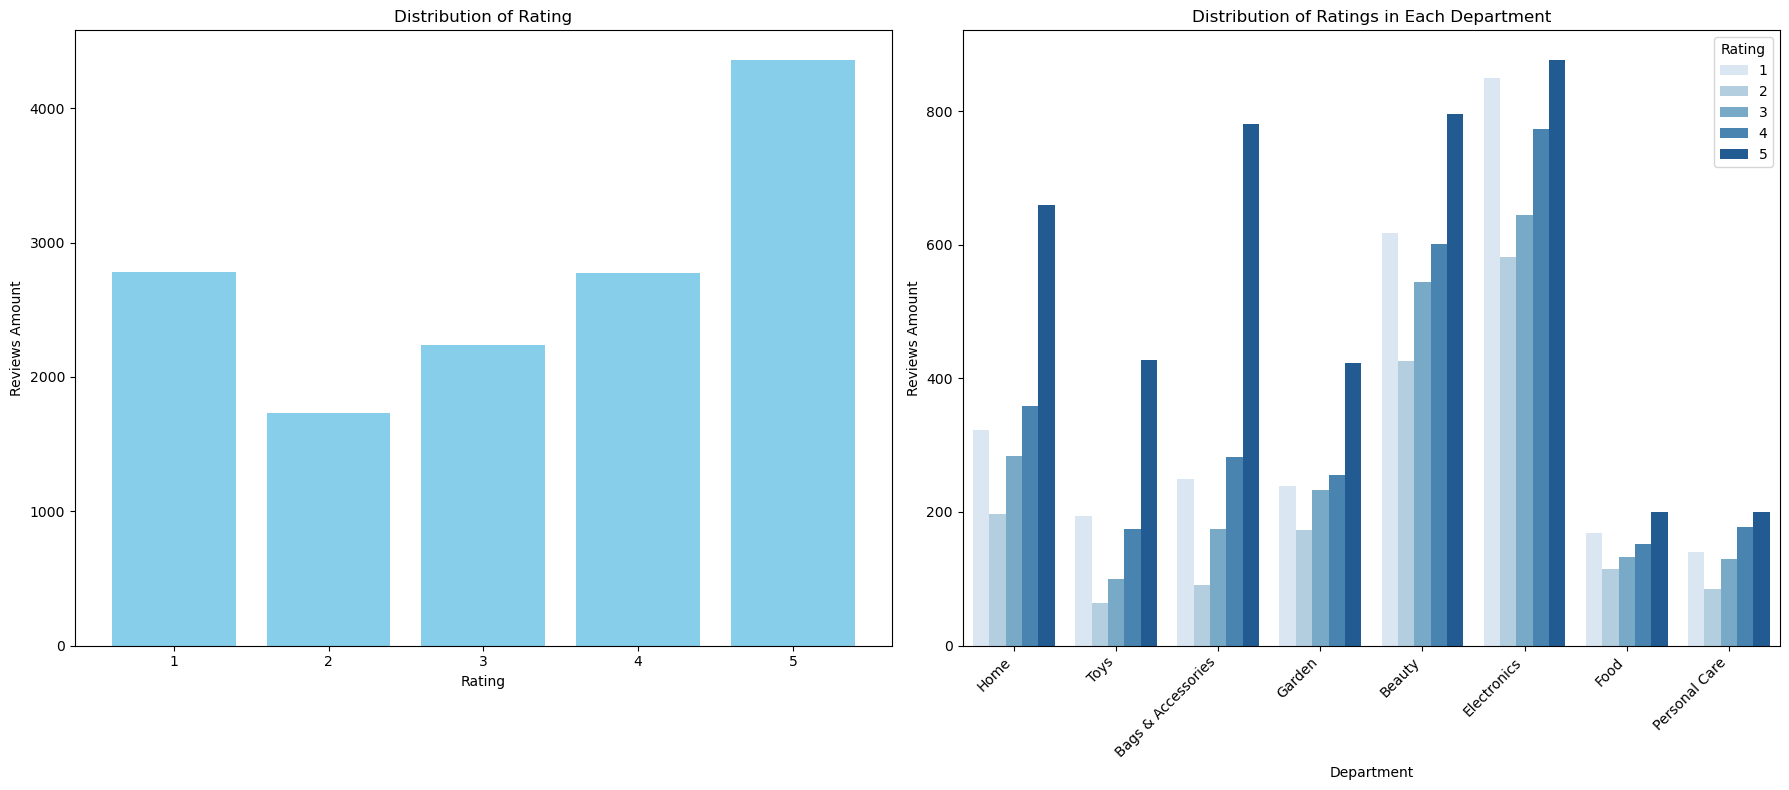

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Distribution of rating
axes[0].bar(df['Rating'].value_counts().sort_index().index, df['Rating'].value_counts().sort_index(), color='skyblue')
axes[0].set_title('Distribution of Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews Amount')

# Second plot: Distribution of ratings in each department
sns.countplot(data=df, x='Department', hue='Rating', palette='Blues', ax=axes[1])
axes[1].set_title('Distribution of Ratings in Each Department')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Reviews Amount')
axes[1].legend(title='Rating')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


<h4>Relative Percentage of Star Ratings by Department Visualization</h4>
<p>Displayed as bar charts, this visualization illustrates the proportion of each star rating within every department.
It offers a concise snapshot of sentiment variations across product categories, enabling quick identification of customer satisfaction trends.
.</p>

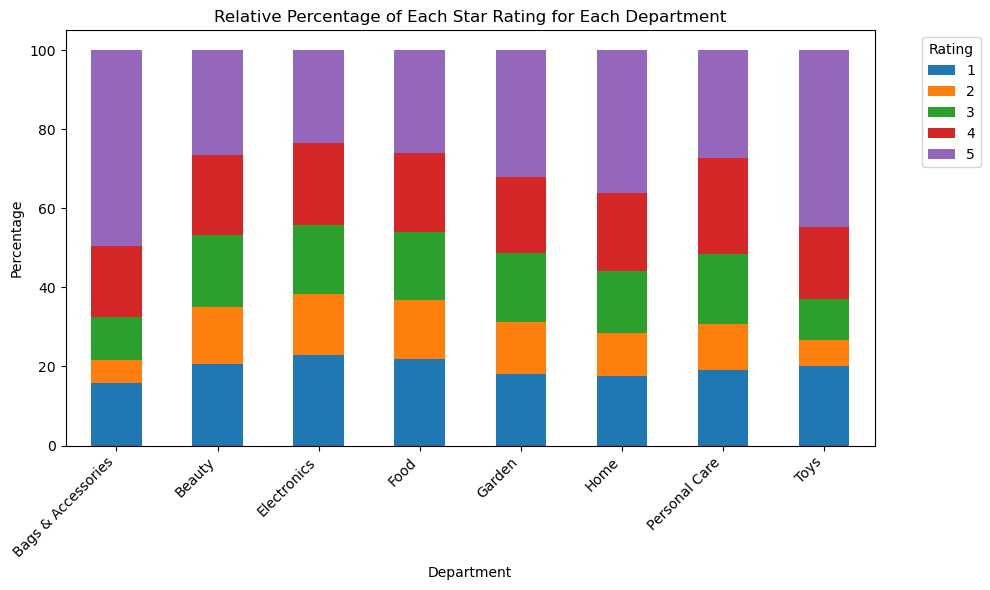

In [20]:

def calculate_department_star_percentages(df):
    
    # Group by department and star rating, and count the number of reviews for each combination
    department_star_counts = df.groupby(['Department', 'Rating']).size().unstack(fill_value=0)

    # Calculate the total number of reviews for each department
    department_total_reviews = department_star_counts.sum(axis=1)

    # Calculate the relative percentage of each star rating within each department
    department_star_percentages = department_star_counts.divide(department_total_reviews, axis=0) * 100

    return department_star_percentages


def display_department_star_percentages(department_star_percentages):
   
    # Plotting the relative percentage of each star rating for each department
    ax = department_star_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

    
    plt.title('Relative Percentage of Each Star Rating for Each Department')
    plt.xlabel('Department')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    

department_star_percentages = calculate_department_star_percentages(df)
display_department_star_percentages(department_star_percentages)


<h4>Histogram of Review Lengths</h4>
<p>We created a histogram to examine the distribution of review lengths.
This visualization allows us to see the most common lengths of reviews and to explore the relationship between review length and the detail of feedback customers are providing.</p>


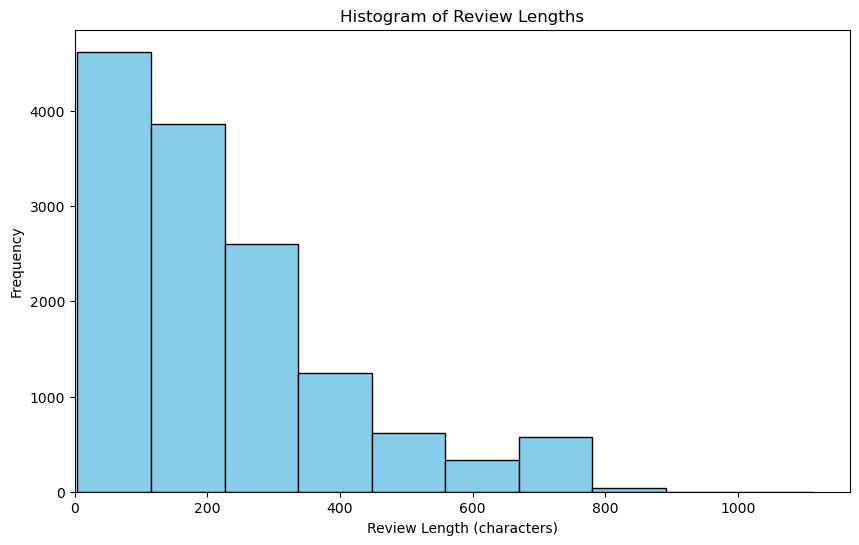

In [21]:
review_lengths = df['Review Text'].str.len()
plt.figure(figsize=(10, 6))

# Create the histogram using automatic bins
plt.hist(review_lengths, color='skyblue', edgecolor='black')

# Set the x-axis to start at 0 
plt.xlim(left=0)

# Set the title and labels
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')

plt.show()


<h2 style="text-align: center" class="list-group-item list-group-item-success">4. NLP Machine Learning For Unsupervised Learning </h2>

In [22]:
#!pip install en_core_web_sm --upgrade
#!pip install spacy
#!pip install spacy --upgrade
#!pip install textblob
#!pip install --upgrade spacy pydantic
#!pip install vaderSentiment
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm

#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')

import nltk
import pandas as pd
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from collections import defaultdict
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from spacy.matcher import PhraseMatcher
from statistics import mean
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline, RobertaTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score

<h3>Electronics Department</h3>
<p>In our machine learning part, we will concentrate on products from the electronic department.
 This focused approach will allow us to develop precise models tailored to understand customer behavior and trends in this specific product category.</p>


In [23]:
da=df[df["Department"]=="Electronics"].copy()

In [24]:
da=df[df["Product ID"]==1051471277].copy()

<h3>Extracts Aspects From Text</h3>

In [25]:
nlp = spacy.load("en_core_web_lg")

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(da['Review Text after'])

# Get feature names 
feature_names = tfidf_vectorizer.get_feature_names_out()

# extract aspects from a review using both POS tagging and TF-IDF scores
def extract_aspects(review, tfidf_matrix, feature_names, top_n=10):
    aspects_pos = []
    doc = nlp(review)
    for token in doc:
        if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop:
            aspects_pos.append(token.text)

    review_tfidf = tfidf_vectorizer.transform([preprocess_text(review)])
    review_tfidf = review_tfidf.toarray().flatten()
    top_indices = review_tfidf.argsort()[-top_n:][::-1]
    aspect_terms_idf = [feature_names[idx] for idx in top_indices]

    # Combine aspects from both methods
    combined_aspects = list(set(aspects_pos + aspect_terms_idf))

    return combined_aspects


<h3>Categorized Aspects</h3>

In [26]:
def Aspect_Group(aspect):
    aspect_groups = {
        'service': ['service', 'support', 'help', 'store', 'worker', 'online', 'website', 'walmart', 'att', 'return', 'warehouse', 'assistance', 'customer', 'care', 'staff', 'employee'],
        'features': ['camera', 'screen', 'processor', 'message', 'feature', 'specification', 'functionality', 'capability'],
        'shipments': ['shipping', 'delivery', 'packaging', 'shipment', 'arrangement', 'dispatch', 'transport', 'delay', 'arrived'],
        'price': ['cost', 'price', 'affordability', 'pricing', 'rate', 'cost-effectiveness', 'value'],
        'battery': ['battery', 'power', 'charge', 'cell', 'energy', 'capacity'],
        'design': ['design', 'appearance', 'look', 'aesthetics', 'style', 'visual', 'form'],
        'performance': ['performance', 'speed', 'efficiency', 'capability', 'execution', 'operation', 'functioning'],
        'compatibility': ['compatibility', 'connectivity', 'integration', 'interoperability', 'suitability', 'adaptability'],
        'ease_of_use': ['ease', 'use', 'user', 'friendly', 'intuitive', 'easy', 'convenience', 'simplicity', 'usability'],
        'reliability': ['reliability', 'durability', 'longevity', 'dependability', 'sturdiness', 'robustness', 'trustworthiness'],
        'sound_quality': ['sound', 'audio', 'speaker', 'acoustics', 'sonic', 'noise', 'soundstage'],
        'display_quality': ['display', 'resolution', 'clarity', 'visuals', 'screen', 'sharpness', 'color', 'brightness'],
        'opinion': ['opinion', 'gift', 'like', 'love', 'great', 'recommend', 'favorite', 'preference', 'choice', 'selection', 'dislike'],
        'feedback': ['feedback', 'review', 'comment', 'critique', 'evaluation', 'assessment', 'input', 'response'],
        'memory_storage': ['memory', 'storage', 'size', 'capacity', 'memory space', 'storage capacity', 'volume'],
        'brand': ['samsung', 'galaxy', 'apple', 'sony', 'lg', 'huawei', 'lenovo', 'dell', 'hp', 'xiaomi', 'asus', 'acer', 'google', 'motorola', 'nokia', 'oppo', 'vivo', 'oneplus', 'htc', 'blackberry', 'realme'],
    }
    
    for category, aspect_list in aspect_groups.items():
        if aspect in aspect_list:
            return category
    return 'other'  


In [27]:
#extract aspects for each row 
da["Aspects"] = da["Review Text after"].apply(lambda x: extract_aspects(x, tfidf_matrix, feature_names))

#each aspect will be on a seperate row 
da = da.explode('Aspects')

da['Aspect Group'] = da['Aspects'].apply(Aspect_Group)

In [28]:
# Define the function to filter DataFrame based on top 5 most frequent 'Aspect Group'
def filter_top_5_items(df):
    # Count the frequency of each 'Aspect Group' excluding 'other'
    categorized_item_counts = df[df['Aspect Group'] != 'other']['Aspect Group'].value_counts()

    # Get the top 5 most frequent 'Aspect Group'
    top_5 = categorized_item_counts.head(5)
    
    # Filter the dataframe to only include rows with 'Aspect Group' in the top 5
    filtered_df = df[df['Aspect Group'].isin(top_5.index)]
    
    return filtered_df

# Use the function to filter the dataframe
da = filter_top_5_items(da)



<h3>Load Pre-trained Model And Classify Sentiments</h3>
<p>We initiate our aspect-based sentiment analysis by loading a pre-trained DeBERTa v3 model specialized for ABSA, identified by the name "<a href="https://huggingface.co/yangheng/deberta-v3-base-absa-v1.1" target="_blank">yangheng/deberta-v3-base-absa-v1.1</a>". This involves preparing both the model and its corresponding tokenizer to process and analyze customer reviews effectively. The choice of this specific pre-trained model is aimed at leveraging its advanced capabilities in understanding the nuances of sentiment at the aspect level, ensuring precise analysis of customer feedback across various products.</p>


In [29]:

model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


<h3>Targeted Sentiment Analysis for Specific Aspects</h3>
<p>Our sentiment analysis pipeline evaluates sentiments towards individual aspects mentioned in a review with precision. By analyzing each aspect distinctly, we can uncover a comprehensive view of customer opinions. In the analysis of a review, we observed:</p>
<ul>
        <li><strong>Aspect:</strong> Camera; <strong>Sentiment:</strong> Positive; <strong>Confidence:</strong> 99.73%.</li>
    <li><strong>Aspect:</strong> Battery; <strong>Sentiment:</strong> Negative; <strong>Confidence:</strong> 99.70%.</li>
</ul>
<p>This illustrates our model's capability to discern and accurately classify sentiments for different aspects within the same review. The high confidence scores indicate a strong certainty in the sentiment assessments, providing valuable insights for understanding customer feedback in detail.</p>



In [30]:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
for aspect in ['camera',"battery"]:
   print(aspect, classifier('The camera is amazing but the battery is bad',  text_pair=aspect))


camera [{'label': 'Positive', 'score': 0.9972971081733704}]
battery [{'label': 'Negative', 'score': 0.9969896078109741}]


In [31]:
def Transformer_result(text, aspect, model, tokenizer):
    classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)
    prediction = classifier(text, text_pair=aspect)
    sentiment = prediction[0]['label']  # Sentiment label
    score = prediction[0]['score']  # Sentiment score
    
    return sentiment, score


In [32]:
da[['Transformer', 'Transformer Score']] = da.apply(lambda x: Transformer_result(x['Review Text after'], x['Aspects'], model, tokenizer), axis=1, result_type='expand')


In [33]:
da.head()

,Product ID,Product Name,Title,Review Text,Reviewer Name,Original Platform,Stars Given,Review Date,Scrape Date,Department,Rating,language,Review Text after,Title after,Aspects,Aspect Group,Transformer,Transformer Score
13250,1051471277,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prep...",Great phone for the price!,"This phone is in my opinion, great! Even my hu...",LadyCJ63645,Walmart,5 out of 5 stars review,No Date,15/03/2024,Electronics,5,Language.ENGLISH,phone opinion great even husband bought one ti...,great phone price,great,opinion,Positive,0.997904
13250,1051471277,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prep...",Great phone for the price!,"This phone is in my opinion, great! Even my hu...",LadyCJ63645,Walmart,5 out of 5 stars review,No Date,15/03/2024,Electronics,5,Language.ENGLISH,phone opinion great even husband bought one ti...,great phone price,opinion,opinion,Positive,0.998471
13250,1051471277,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prep...",Great phone for the price!,"This phone is in my opinion, great! Even my hu...",LadyCJ63645,Walmart,5 out of 5 stars review,No Date,15/03/2024,Electronics,5,Language.ENGLISH,phone opinion great even husband bought one ti...,great phone price,service,service,Positive,0.997614
13250,1051471277,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prep...",Great phone for the price!,"This phone is in my opinion, great! Even my hu...",LadyCJ63645,Walmart,5 out of 5 stars review,No Date,15/03/2024,Electronics,5,Language.ENGLISH,phone opinion great even husband bought one ti...,great phone price,att,service,Positive,0.995928
13251,1051471277,"AT&T Samsung Galaxy A14 5G, 64GB Black - Prep...",This phone bricked my SIM card.,Put my old sim card into this phone when I got...,BLAL,Walmart,1 out of 5 stars review,No Date,15/03/2024,Electronics,1,Language.ENGLISH,put old sim card phone got spent hour transfer...,phone bricked sim card,att,service,Negative,0.916212


<h4>Efficiency-Driven Aspect Selection</h4>
<p>To optimize our sentiment analysis in terms of processing time and relevance, we focus on the top five most mentioned aspect groups per product. This approach:</p>
<ul>
    <li>Improves model efficiency by limiting the scope of analysis.</li>
    <li>Excludes less mentioned aspect groups, concentrating on those that impact most users.</li>
</ul>
<p>This targeted analysis ensures meaningful insights without overwhelming the model or diluting results with infrequently mentioned aspect groups.</p>


<h4>Processing Sentiment Classification Results</h4>
<p>To further refine our sentiment analysis, we process the classification results with a focus on efficiency and clarity:</p>
<ul>
    <li>Consolidates sentiment counts for each aspect within a review, distinguishing between 'Positive' and 'Negative' sentiments.</li>
    <li>Avoids recounting by marking the presence of sentiment types once per aspect, per review.</li>
</ul>

<h4>Aggregating and Visualizing Sentiment Analysis</h4>
<p>We aggregate sentiment counts across all reviews to understand overall sentiment towards each aspect. This step involves:</p>
<ul>
    <li>Summing up 'Positive' and 'Negative' counts for each aspect.</li>
    <li>Transforming the aggregated data into a DataFrame for visualization.</li>
</ul>
<p>The bar chart displays these sentiments per each aspect group, offering a clear visual of predominant sentiments across our product range.</p>


In [34]:
import pandas as pd

def count_aspect_sentiments(df, aspect_col='Aspect Group', sentiment_col='Transformer'):
 
    overall_aspect_sentiment = {}

    # Iterate through the DataFrame
    for _, row in df.iterrows():
        aspect = row[aspect_col]
        sentiment = row[sentiment_col]
        
        # Initialize the aspect in the dictionary if it's not already present
        if aspect not in overall_aspect_sentiment:
            overall_aspect_sentiment[aspect] = {'Positive': 0, 'Negative': 0}
        
        # Update the sentiment count based on the sentiment column's value
        if sentiment == 'Positive':
            overall_aspect_sentiment[aspect]['Positive'] += 1
        elif sentiment == 'Negative':
            overall_aspect_sentiment[aspect]['Negative'] += 1

    # Convert the dictionary to a DataFrame for a tabular view
    sentiment_df = pd.DataFrame.from_dict(overall_aspect_sentiment, orient='index').reset_index()
    sentiment_df.columns = [aspect_col, 'Positive', 'Negative']  
    sentiment_df = sentiment_df.set_index(aspect_col)

    return sentiment_df

sentiment_df = count_aspect_sentiments(da, 'Aspect Group', 'Transformer')



In [35]:
sentiment_df

,Positive,Negative
Aspect Group,,
opinion,36,18
service,26,75
features,27,10
brand,12,6
battery,9,6


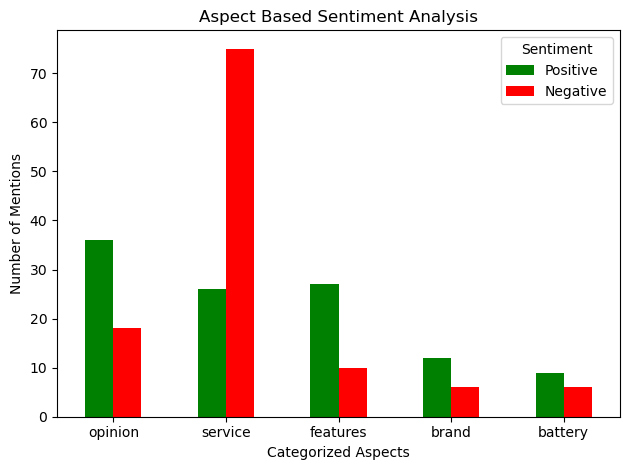

In [36]:
import matplotlib.pyplot as plt

def plot_aspect_based_sentiment(sentiment_df):

    # Plotting
    sentiment_df.plot(kind='bar', color=['green', 'red'])
    plt.title('Aspect Based Sentiment Analysis')
    plt.xlabel('Categorized Aspects')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=0)  # Rotate labels to prevent overlap
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.legend(title='Sentiment')
    plt.show()
plot_aspect_based_sentiment(sentiment_df)


<h3>Sentiment Analysis Across Models</h3>
<p>Following our transformer's sentiment analysis, we aim to compare results by applying <strong>TextBlob</strong> and <strong>VADER</strong> to aspect-specific text snippets. This comparison helps us understand different models' perspectives on the same aspects.</p>
<p>Using the <code>find_aspect_span</code> function, we focus on snippets around aspects within a review, highlighted by a window size.</p>
<p>For example, consider the review:</p>
<div style="border: 1px solid #ccc; padding: 10px; margin-bottom: 10px;">
    "The <strong>camera</strong> quality is outstanding, but im very dissapointed with the <strong>battery</strong> life."
</div>
<p>With a window size of 3, we extract the following snippets:</p>
<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; margin-bottom: 10px;">
    "The <strong>camera</strong> quality is outstanding ..."
</div>
<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9;">
    "... dissapointed with the <strong>battery</strong> life"
</div>



In [37]:

def find_aspect_span(review, aspect, window_size):
    doc = nlp(review)
    aspect_terms = aspect.split()  # Splitting the aspect into terms for matching

    for token in doc:
        if token.text.lower() in [term.lower() for term in aspect_terms]:
            start = max(token.i - window_size, 0)
            end = min(token.i + window_size + 1, len(doc))
            span = doc[start:end]
            return span.text
    return review 


<h3>Enhanced Sentiment Analysis via Compound Score Calculation</h3>
<p>In our refined sentiment analysis approach, we employ <strong>TextBlob</strong> and <strong>VADER</strong> to calculate compound sentiment scores. This process leverages varied window sizes to accurately target text surrounding each aspect. Here’s how it works:</p>
<ul>
    <li>We extract text snippets around aspects within defined window sizes, ensuring comprehensive sentiment capture.</li>
    <li>Each snippet’s sentiment is analyzed with both TextBlob and VADER, yielding polarity and compound scores, respectively.</li>
    <li>The average of these scores across all windows provides a nuanced sentiment measure for each aspect.</li>
</ul>
<p>This strategy enhances the precision of our sentiment analysis, allowing us to draw more accurate conclusions about the sentiment toward specific aspects in our dataset.</p>


In [38]:
#example
find_aspect_span("The camera quality is outstanding but im very dissapointed with the battery life", "camera", 4)

'The camera quality is outstanding but'

In [39]:
from textblob import TextBlob
import spacy
from statistics import mean

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def find_aspect_span(review, aspect, window_size):

    doc = nlp(review)
    aspect_terms = aspect.split()

    for token in doc:
        if token.text.lower() in [term.lower() for term in aspect_terms]:
            start = max(token.i - window_size, 0)
            end = min(token.i + window_size + 1, len(doc))
            span = doc[start:end]
            return span.text
    return review

def calculate_polarity_for_windows_textblob(review, aspect, windows):
    polarities = []
    for window in windows:
        segment = find_aspect_span(review, aspect, window)
        analysis = TextBlob(segment)
        polarities.append(analysis.sentiment.polarity)
    
    # Calculate the average polarity
    avg_polarity = mean(polarities) if polarities else 0
   
    # Categorize the sentiment based on the average polarity
    return "Positive" if avg_polarity > 0 else "Negative"


def calculate_polarity_and_categorize_vader(review, aspect, windows):
    
    analyzer = SentimentIntensityAnalyzer()
    scores = []
    
    for window in windows:
        segment = find_aspect_span(review, aspect, window)
        sentiment_score = analyzer.polarity_scores(segment)
        scores.append(sentiment_score['compound'])
    
    # Calculate the average score
    avg_score = mean(scores) if scores else 0
    
    # Categorize the sentiment based on the average score
    return "Positive" if avg_score > 0 else "Negative"


In [40]:
windows = [1, 2,3,4]  
da['TextBlob'] = da.apply(lambda row: calculate_polarity_for_windows_textblob(row['Review Text after'], row['Aspects'], windows), axis=1)
da['Vader'] = da.apply(lambda row: calculate_polarity_and_categorize_vader(row['Review Text after'], row['Aspects'], windows), axis=1)

<h3>Model Similarity Matrix Visualization</h3>
<p>This heatmap visualizes model similarities, highlighting how often models produce the same results out of total comparisons.</p>


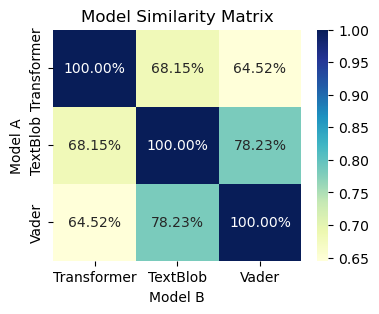

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


def compare_sentiment_and_visualize_similarity_simple(df):
    models = ['Transformer', 'TextBlob', 'Vader']
    
    # Initialize an empty DataFrame for similarity scores
    similarity_matrix = pd.DataFrame(0, index=models, columns=models, dtype=float)
    
    # Calculate similarity scores
    for model1 in models:
        for model2 in models:
            if model1 != model2:
                # Calculate the percentage of rows where the sentiment matches between model1 and model2
                similarity_score = (df[model1] == df[model2]).mean()
                similarity_matrix.loc[model1, model2] = similarity_score
            else:
                # Similarity with itself is 100%
                similarity_matrix.loc[model1, model2] = 1
    
    # Plotting the similarity matrix as a heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", fmt=".2%")
    plt.title('Model Similarity Matrix')
    plt.ylabel('Model A')
    plt.xlabel('Model B')
    plt.show()
    
    return similarity_matrix

similarity_matrix = compare_sentiment_and_visualize_similarity_simple(da)


<h3>Sentiment Analysis Visualization by Aspect Groups  </h3>

<p>These graphs compare how each sentiment analysis method captures positive and negative sentiments, while also showing sentiment distribution across different aspect groups.</p>



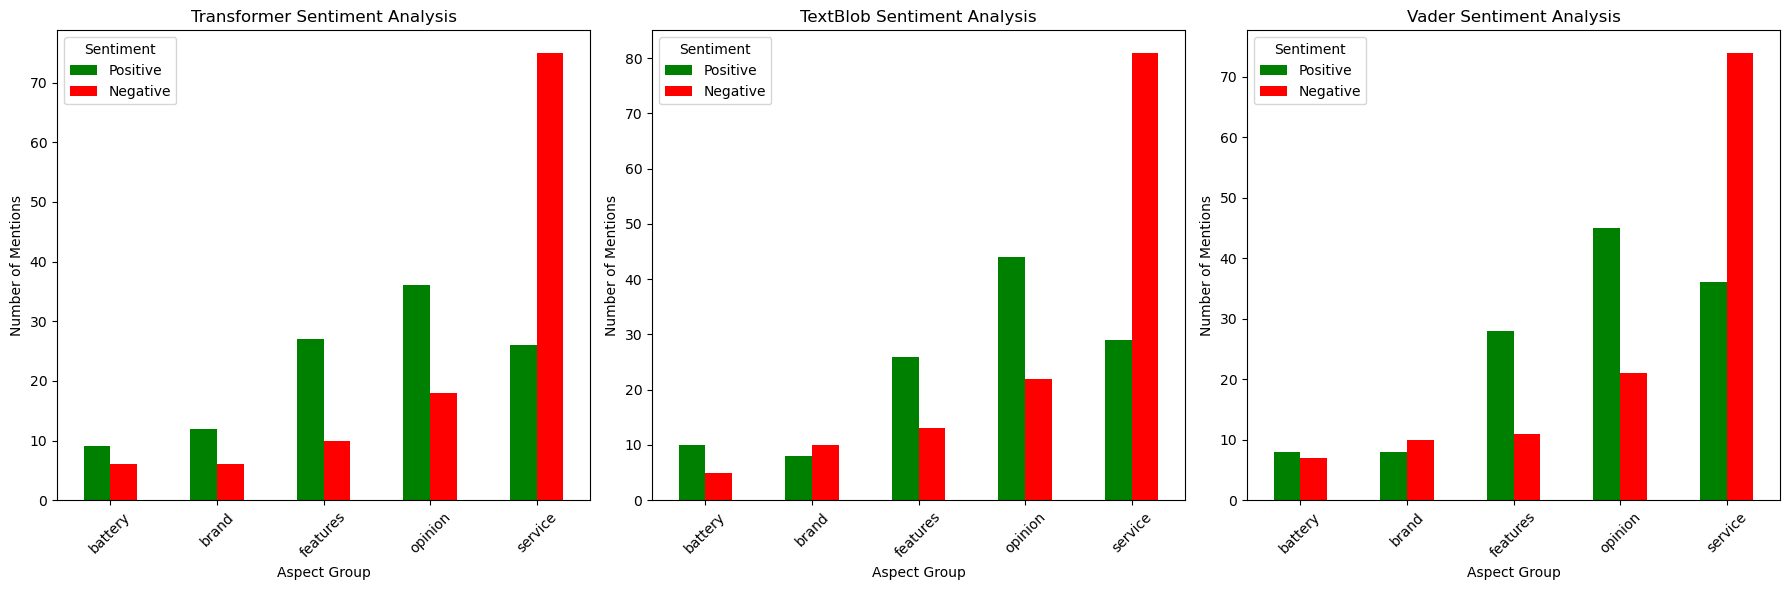

In [42]:
def visualize_sentiment_by_aspect_group_side_by_side(df):
    # Initialize a dictionary to hold the sentiment counts for each aspect and method
    overall_aspect_sentiment = {}

    for method in ['Transformer', 'TextBlob', 'Vader']:
        overall_aspect_sentiment[method] = (
            df.groupby('Aspect Group')[method]
            .value_counts()
            .unstack(method, fill_value=0)
        )

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Wide layout to have plots side by side

    for ax, (method, sentiment_counts) in zip(axes, overall_aspect_sentiment.items()):
        # Plotting on the current axis
        sentiment_counts[['Positive', 'Negative']].plot(kind='bar', stacked=False, color=['green', 'red'], title=f'{method} Sentiment Analysis', ax=ax)
        ax.set_xlabel('Aspect Group')
        ax.set_ylabel('Number of Mentions')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Sentiment')

    plt.tight_layout()
    plt.show()


visualize_sentiment_by_aspect_group_side_by_side(da)



In [43]:
da = da[['Product ID', 'Rating','Aspects', 'Review Text',"Review Text after", 'Transformer', 'TextBlob', 'Vader']].copy()
da

,Product ID,Rating,Aspects,Review Text,Review Text after,Transformer,TextBlob,Vader
13250,1051471277,5,great,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive
13250,1051471277,5,opinion,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive
13250,1051471277,5,service,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive
13250,1051471277,5,att,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Negative
13251,1051471277,1,att,Put my old sim card into this phone when I got...,put old sim card phone got spent hour transfer...,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...
13399,1051471277,5,gift,great price\nlove the phone fast easy to use,great price love phone fast easy use,Positive,Positive,Positive
13399,1051471277,5,galaxy,great price\nlove the phone fast easy to use,great price love phone fast easy use,Positive,Positive,Positive
13399,1051471277,5,love,great price\nlove the phone fast easy to use,great price love phone fast easy use,Positive,Positive,Positive
13400,1051471277,5,gift,Does everything i need it to do!,everything need,Positive,Negative,Negative


In [44]:
#create test columns
def create_test_columns(row):
    # Determine expected sentiment based on rating
    expected_sentiment = 'Positive' if row['Rating'] >= 4 else 'Negative'
    
    # For each model, check if the prediction matches the expected sentiment
    row['Transformer_test'] = 1 if row['Transformer'] == expected_sentiment else 0
    row['TextBlob_test'] = 1 if row['TextBlob'] == expected_sentiment else 0
    row['Vader_test'] = 1 if row['Vader'] == expected_sentiment else 0
    
    return row

da = da.apply(create_test_columns, axis=1)
da.head()

,Product ID,Rating,Aspects,Review Text,Review Text after,Transformer,TextBlob,Vader,Transformer_test,TextBlob_test,Vader_test
13250,1051471277,5,great,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive,1,1,1
13250,1051471277,5,opinion,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive,1,1,1
13250,1051471277,5,service,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive,1,1,1
13250,1051471277,5,att,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Negative,1,1,0
13251,1051471277,1,att,Put my old sim card into this phone when I got...,put old sim card phone got spent hour transfer...,Negative,Negative,Negative,1,1,1


In [45]:

def calculate_metrics(expanded_df):
    
    # Extract the true values based on the rating, mapping them to 1 for positive and 0 for negative
    y_true = (expanded_df['Rating'] >= 4).astype(int)

    # Extract model predictions from the test columns
    y_pred_transformer = expanded_df['Transformer_test']
    y_pred_textblob = expanded_df['TextBlob_test']
    y_pred_vader = expanded_df['Vader_test']

    # Calculate metrics for each model
    metrics = {
        'Transformer': {
            'Precision': precision_score(y_true, y_pred_transformer),
            'Recall': recall_score(y_true, y_pred_transformer),
            'F1': f1_score(y_true, y_pred_transformer)
        },
        'TextBlob': {
            'Precision': precision_score(y_true, y_pred_textblob),
            'Recall': recall_score(y_true, y_pred_textblob),
            'F1': f1_score(y_true, y_pred_textblob)
        },
        'Vader': {
            'Precision': precision_score(y_true, y_pred_vader),
            'Recall': recall_score(y_true, y_pred_vader),
            'F1': f1_score(y_true, y_pred_vader)
        }
    }
    
    return metrics


metrics = calculate_metrics(da)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Round the values in the DataFrame to 2 decimal places
metrics_df = metrics_df.round(2)

# Display the DataFrame
metrics_df

,Transformer,TextBlob,Vader
Precision,0.49,0.48,0.50
Recall,0.76,0.71,0.71
F1,0.60,0.57,0.59


<h3>Performance Metrics Visualization </h3>

<p>This graph illustrates the performance metrics (Precision, Recall, and F1 Score) of our 3 models.</p>



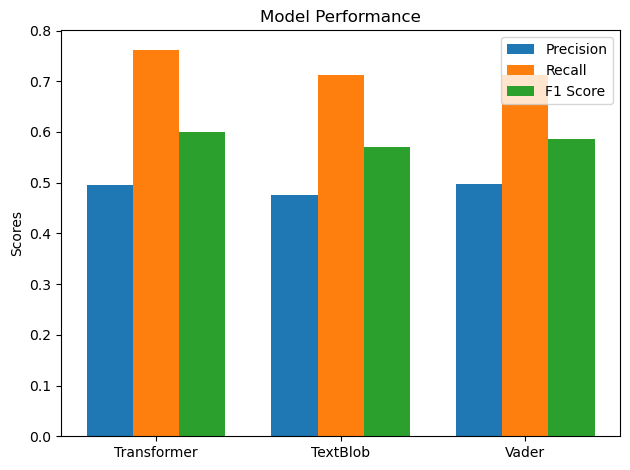

In [46]:


def plot_metrics(metrics):
    
    model_names = list(metrics.keys())
    precision_values = [metrics[model]['Precision'] for model in model_names]
    recall_values = [metrics[model]['Recall'] for model in model_names]
    f1_values = [metrics[model]['F1'] for model in model_names]

    # Plotting
    x = np.arange(len(model_names))
    width = 0.25

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, precision_values, width, label='Precision')
    rects2 = ax.bar(x, recall_values, width, label='Recall')
    rects3 = ax.bar(x + width, f1_values, width, label='F1 Score')

    ax.set_ylabel('Scores')
    ax.set_title('Model Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    fig.tight_layout()

    plt.show()

plot_metrics(metrics)


<h3>Reading the Human Annotation data </h3>

<p>After manually tagging the sentiment aspects of reviews, we are comparing the results of the three models with our human annotation results.</p>


In [47]:
raw_url = 'https://raw.githubusercontent.com/NetanelFarhi/Walmart-Data/main/y_test.csv'

# Read the CSV file into a DataFrame
y_test = pd.read_csv(raw_url,encoding='ISO-8859-1')
y_test=y_test.drop(['Transformer_test', 'TextBlob_test', 'Vader_test'], axis=1)
y_test=y_test.dropna()
y_test['Product ID'] = pd.to_numeric(y_test['Product ID'], errors='coerce')
# Convert 'Product ID' to string
y_test['Product ID'] = y_test['Product ID'].astype(str)

# Remove the trailing '.0'
y_test['Product ID'] = y_test['Product ID'].str.rstrip('.0')
y_test['Product ID'] = y_test['Product ID'].astype(int)
# Rename the last column
new_name = 'y_test'
columns = y_test.columns.tolist()  
columns[-1] = new_name 
y_test.columns = columns  


In [48]:
result_df = pd.merge(y_test,
                     da[['Product ID','Rating','Review Text' ,'Aspects', 'Transformer', 'TextBlob', 'Vader']],
                     on=['Product ID', 'Rating','Aspects','Transformer', 'TextBlob', 'Vader',"Review Text"],
                     how='left')

result_df=result_df.dropna()

result_df.head(2)

,Product ID,Rating,Aspects,Aspect Group,Review Text,Review Text after,Transformer,TextBlob,Vader,y_test
0,1051471277,5.0,att,service,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Negative,Positive
1,1051471277,5.0,service,service,"This phone is in my opinion, great! Even my hu...",phone opinion great even husband bought one ti...,Positive,Positive,Positive,Positive


In [49]:
mapping = {'Positive': 1, 'Negative': 0,'Neutral':0}
result_df['y_test_binary'] = result_df['y_test'].map(mapping)
result_df['Transformer_binary'] = result_df['Transformer'].map(mapping)
result_df['TextBlob_binary'] = result_df['TextBlob'].map(mapping)
result_df['Vader_binary'] = result_df['Vader'].map(mapping)

# Ensure all binary columns are of type int, converting NaNs to a default value if necessary
result_df['y_test_binary'] = result_df['y_test_binary'].astype(int)
result_df['Transformer_binary'] = result_df['Transformer_binary'].fillna(0).astype(int) # Fill NaNs with 0 as a default
result_df['TextBlob_binary'] = result_df['TextBlob_binary'].fillna(0).astype(int) # Fill NaNs with 0 as a default
result_df['Vader_binary'] = result_df['Vader_binary'].fillna(0).astype(int) # Fill NaNs with 0 as a default


In [50]:

# Initialize a dictionary to store the metrics for each model
metrics = {}

# List of models for easier iteration
models = ['Transformer', 'TextBlob', 'Vader']

# Calculate metrics
for model in models:
    binary_pred_column = model + '_binary'
    metrics[model] = {
        'Precision': precision_score(result_df['y_test_binary'], result_df[binary_pred_column]),
        'Recall': recall_score(result_df['y_test_binary'], result_df[binary_pred_column]),
        'F1': f1_score(result_df['y_test_binary'], result_df[binary_pred_column])
    }

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Round the values in the DataFrame to 2 decimal places
metrics_df = metrics_df.round(2)

# Display the DataFrame
metrics_df


,Transformer,TextBlob,Vader
Precision,0.8,0.33,0.25
Recall,0.8,1.00,0.60
F1,0.8,0.50,0.35


<h3>The Pipline - using deberta-v3 model</h3>

<p>We ran the data in a single process to compare the pipeline model's processing time with that of other models.</p>


In [51]:
import time
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

nlp = spacy.load("en_core_web_lg") 
tfidf_vectorizer = TfidfVectorizer()

#df = scrape_walmart_reviews(product_id)


def predicting_pipeline(df):  
    start_time=time.time()
    model_name = "yangheng/deberta-v3-base-absa-v1.1"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    
    df = drop_duplicates(df)
    
    df=df[df["Review Text"]!="No Review Text"]
    
    df['Rating'] = df['Stars Given'].apply(extract_rating)
    
    df['Product Name'] = df['Product Name'].str.replace('Back to', '')
    
    df = detect_language(df)

    df =df[df["language"]=="Language.ENGLISH"].copy()
    
    df['Review Text'] = df['Review Text'].apply(convert_numbers_to_words)

    df['Review Text after'] = df['Review Text'].apply(preprocess_text)
    df['Title after'] = df['Title'].apply(preprocess_text)
        
    # Vectorization with TF-IDF
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Text after'])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Aspect extraction and categorization
    df["Aspects"] = df["Review Text after"].apply(lambda x: extract_aspects(x, tfidf_matrix, feature_names))
    df = df.explode('Aspects')
    df['Aspect Group'] = df['Aspects'].apply(Aspect_Group)
    df = filter_top_5_items(df)
    df[['Transformer', 'Transformer Score']] = df.apply(lambda x: Transformer_result(x['Review Text after'], x['Aspects'], model, tokenizer), axis=1, result_type='expand')
    df = count_aspect_sentiments(df, 'Aspect Group', 'Transformer')
    
    #plot_aspect_based_sentiment(df)
    end_time = time.time()  # End time measurement
    duration = end_time - start_time  # Calculate total duration
    print(f"Total script execution time: {duration} seconds")


df = dm
processed_df = predicting_pipeline(df)



Total script execution time: 61.42758226394653 seconds


<h3>The Pipline - using TextBlob</h3>



In [52]:

nlp = spacy.load("en_core_web_lg") 
tfidf_vectorizer = TfidfVectorizer()

#df = scrape_walmart_reviews(product_id)


def predicting_pipeline_textblob(df):    
    start_time=time.time()
    
    df = drop_duplicates(df)
    
    df=df[df["Review Text"]!="No Review Text"]
    
    df['Rating'] = df['Stars Given'].apply(extract_rating)
    
    df['Product Name'] = df['Product Name'].str.replace('Back to', '')
    
    df = detect_language(df)

    df =df[df["language"]=="Language.ENGLISH"].copy()
    
    df['Review Text'] = df['Review Text'].apply(convert_numbers_to_words)

    df['Review Text after'] = df['Review Text'].apply(preprocess_text)
    df['Title after'] = df['Title'].apply(preprocess_text)
        
    # Vectorization with TF-IDF
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Text after'])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Aspect extraction and categorization
    df["Aspects"] = df["Review Text after"].apply(lambda x: extract_aspects(x, tfidf_matrix, feature_names))
    df = df.explode('Aspects')
    df['Aspect Group'] = df['Aspects'].apply(Aspect_Group)
    df = filter_top_5_items(df)
    windows = [1, 2,3,4]  
    df['TextBlob'] = df.apply(lambda row: calculate_polarity_for_windows_textblob(row['Review Text after'], row['Aspects'], windows), axis=1)

    df = count_aspect_sentiments(df, 'Aspect Group', 'TextBlob')
    #plot_aspect_based_sentiment(df)
    end_time = time.time()  # End time measurement
    duration = end_time - start_time  # Calculate total duration
    print(f"Total script execution time: {duration} seconds")


    


df = dm
processed_df = predicting_pipeline_textblob(df)



Total script execution time: 12.709274053573608 seconds


In [ ]:
##################################################################################################################################################################

<h3> Drafts </h3>



In [ ]:
#scrape reviews by name instead of Product ID - After a couple of iterations we are being blocked 

def get_product_code_by_name(product_name):
    search_url = "https://www.walmart.com/search?q=" + product_name
    user_agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}
    
    response = requests.get(search_url, headers=user_agent)

    if response.status_code == 200:
        
        soup = BeautifulSoup(response.content, 'html.parser')
        product_link = soup.find('a', {'class': 'absolute w-100 h-100 z-1 hide-sibling-opacity'})
        
        if product_link and 'link-identifier' in product_link.attrs:
            return product_link['link-identifier']
    return None


# Example usage
#reviews_link="https://www.walmart.com/reviews/product/"
#product_name = "Irobot"
#product_code = get_product_code_by_name(product_name)
#reviews_link=reviews_link+product_code
#print("the product code is : ",product_code)
#print("the product reviews link : ",reviews_link)

#product_id=[product_code]
#reviews_1_prod = scrape_walmart_reviews(product_id)
#reviews_1_prod